<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 bis
#### Lugano Damian

## Consigna 

<img src="./pics/consigna.png" align="center" width="600" />

## Resolución

In [2]:
from IPython.display import IFrame
IFrame("./docs/TS4bis.pdf", width=950, height=1000)

## Simulaciones

### Simulación numerica

In [3]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import scipy.signal as sig
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [4]:
#Plantilla del filtro pasa bajos prototipo

#wp=1
ws=2.16
alpha_max=3
alpha_min=20
KdB=10
Kveces=10**(KdB/20)

#### Transferencia factorizada del Filtro pasa banda Butterworth de tercer orden

<IPython.core.display.Math object>

#### Transferencia factorizada y parametrizada del Filtro pasa banda Butterworth de tercer orden

<IPython.core.display.Math object>

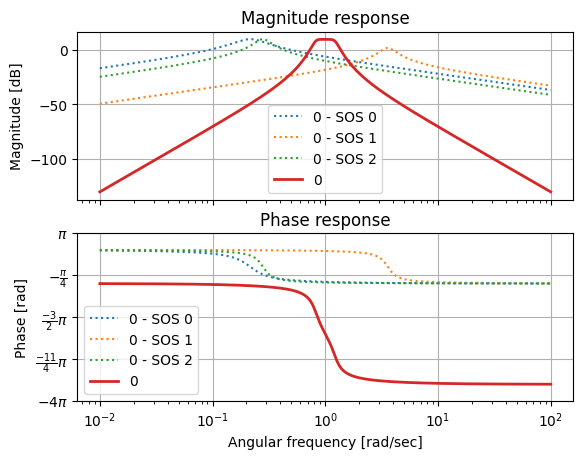

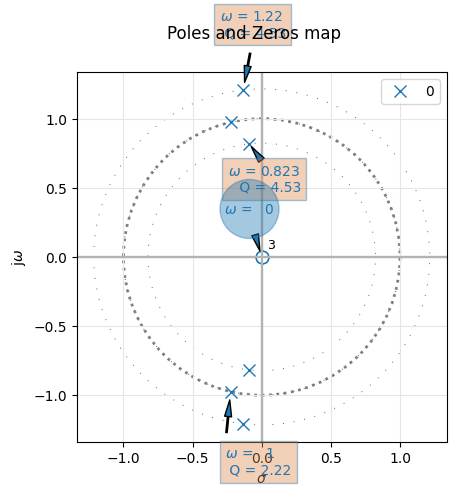

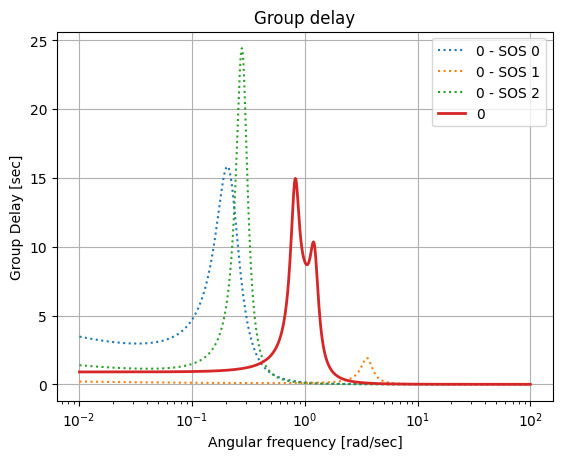

In [6]:
## Filtro pasa bajos Butterworth de tercer orden
ee = ( np.sqrt( 10**(alpha_max / 10) - 1 ))    #Por lo general w_p=1    
order=np.ceil( 0.5 * ( np.log10( ( 10**(alpha_min * 0.1) - 1 ) / ee**2)  / np.log10(ws) ) ) 
z,p,k = sig.buttap (order)
N, D = sig.zpk2tf(z, p, k)
N,D = sig.lp2bp(N,D, 1, 0.45)

sos_bp = tf2sos_analog(N, D)
sos_bp[sos_bp < 1e-6] = 0.0
print_subtitle('Transferencia factorizada del Filtro pasa banda Butterworth de tercer orden')
pretty_print_SOS(sos_bp)
print_subtitle('Transferencia factorizada y parametrizada del Filtro pasa banda Butterworth de tercer orden')
pretty_print_SOS(sos_bp, mode='omegayq')

#analyze_sys(sos_bp)

## Simulación Circuital con LTspice

<img src="./pics/FPB_circ.png" align="center" width="1000" />

<img src="./pics/FPB_graf3.png" align="center" width="1000" />

<img src="./pics/FPB_graf1.png" align="center" width="1000" />

<img src="./pics/FPB_graf2.png" align="center" width="1000" />

## Conclusiones

De la presente tarea semanal 4bis se observa que para un diseño de un pasa banda de orden n, la transferencia final tendrá n sistemas pasa banda de orden 2. En específico para este caso de $n=3$, la transferencia final queda con **3 sistemas de orden 2**, donde uno de ellos tiene los polos sobre la circunferencia de **radio 1** y un $Q=2.22$ , igual al Q del pasa banda. Por otro lado, las 2 transferencias restantes tendrán los polos sobre radios recíprocos y ambos pares de polos tendrán el mismo valor de Q. En este caso, el radio de los polos $R_{P12}=1.216$ que es el recíproco de los polos $R_{P34}=\frac{1}{1.216}=0.824$ y el valor de $Q=4.53$

Tambien es importante aclarar que la simulación circuital no da exacta ya que se redondearon los números que componen los numeradores y denominadores de las transferencia para mayor simplicidad de los cálculos.